# Laboratorio de regresión - 2

|                |   |
:----------------|---|
| **Nombre**     |Miguel Aaron Castillon Ochoa   |
| **Fecha**      01-09-2025|   |
| **Expediente**751858 |   |

## Regresión polinomial

Observa la siguiente gráfica.

In [2]:
import matplotlib.pyplot as plt; import numpy as np
%matplotlib inline
np.random.seed(0)
x = np.linspace(-3, 3, 100); y = 1 + 4*x**2 + np.random.normal(0, 1, 100)
plt.figure(); plt.xlabel("x"); plt.ylabel("y")
plt.scatter(x, y); plt.grid()

Utiliza `sklearn` para realizar una regresión lineal simple ($\hat{y} = \hat{\beta_0} + \hat{\beta_1}x $)

In [3]:
from sklearn.linear_model import LinearRegression

# Preparar los datos
X = x.reshape(-1, 1)  # sklearn necesita X como matriz 2D

# Crear y entrenar el modelo
modelo = LinearRegression()
modelo.fit(X, y)

# Imprimir coeficientes
print("Intercepto (β0):", modelo.intercept_)
print("Pendiente (β1):", modelo.coef_[0])




Intercepto (β0): 13.30223225795873
Pendiente (β1): -0.049554477435906644


Crea una gráfica donde se muestren las observaciones como una nube de puntos y la línea que ajustaste con regresión. Calcula el métrico $R^2$.

Intercepto (β0): 13.30223225795873
Pendiente (β1): -0.049554477435906644
R²: 5.80345273922811e-05


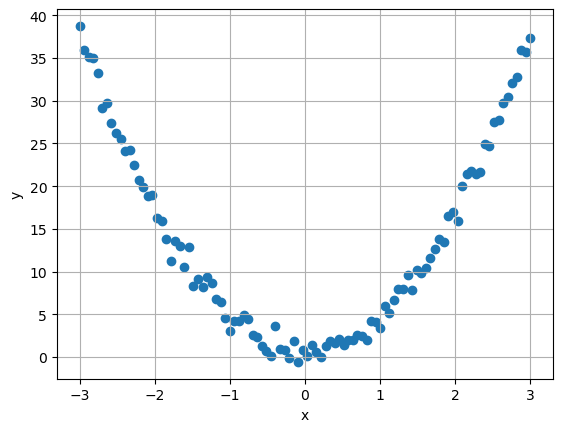

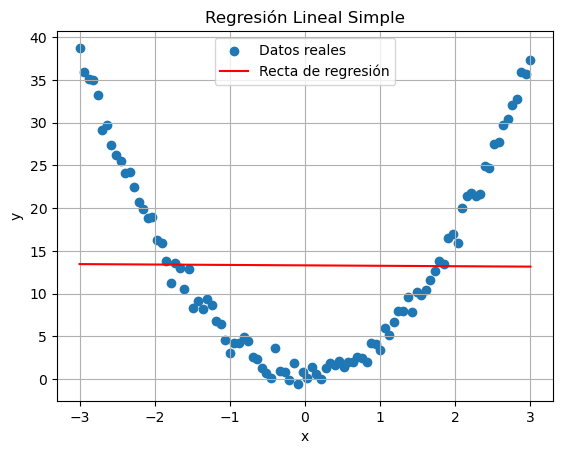

In [4]:
from sklearn.metrics import r2_score

# Predicciones
y_pred = modelo.predict(X)

# Calcular R²
r2 = r2_score(y, y_pred)

# Imprimir resultados
print("Intercepto (β0):", modelo.intercept_)
print("Pendiente (β1):", modelo.coef_[0])
print("R²:", r2)

# Graficar
plt.figure()
plt.scatter(x, y, label="Datos reales")
plt.plot(x, y_pred, color="red", label="Recta de regresión")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.title("Regresión Lineal Simple")
plt.show()


Podemos ver que el ajuste no es correcto, pues parece que tiene un comportamiento cuadrático y estamos intentando ajustar una línea recta.

En lugar de hacer una regresión lineal simple, quizás podamos extender el modelo para que tenga varios factores dentro:

$$ Y = \beta_0 + \beta_1 X + \beta_2 X^2 + ... + \beta_p X^p + \epsilon$$

Ajusta un modelo cuadrático con `sklearn` ($\hat{y} = \hat{\beta_0} + \hat{\beta_1}x + \hat{\beta_1}x^2 $) y calcula su $R^2$.

In [5]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Crear características polinómicas de grado 2
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Ajustar el modelo
modelo_poly = LinearRegression()
modelo_poly.fit(X_poly, y)

# Predicciones
y_poly_pred = modelo_poly.predict(X_poly)

# Calcular R²
r2_poly = r2_score(y, y_poly_pred)

# Imprimir resultados
print("Coeficientes (β):", modelo_poly.coef_)
print("Intercepto (β0):", modelo_poly.intercept_)
print("R² (modelo cuadrático):", r2_poly)



Coeficientes (β): [-0.04955448  4.14388884]
Intercepto (β0): 0.619420963180481
R² (modelo cuadrático): 0.9934118040713642


Crea una gráfica con las observaciones y la nueva curva que ajustaste.

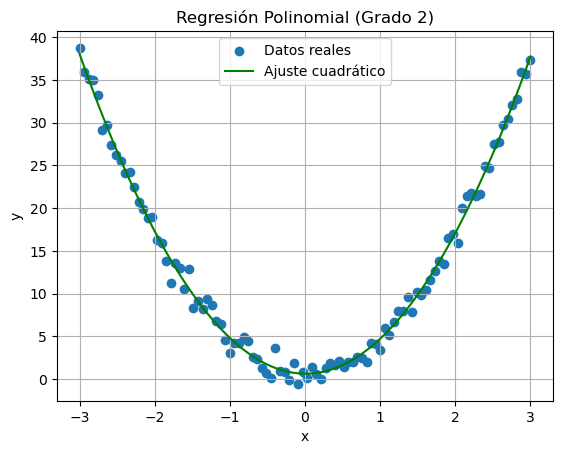

In [6]:
# Graficar
plt.figure()
plt.scatter(x, y, label="Datos reales")
plt.plot(x, y_poly_pred, color="green", label="Ajuste cuadrático")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.title("Regresión Polinomial (Grado 2)")
plt.show()

Ajusta modelos de grados 3, 5, 7, 9, y 11. Calcula su $R^2$.

In [7]:
# Grado 3
poly3 = PolynomialFeatures(degree=3, include_bias=False)
X_poly3 = poly3.fit_transform(X)
modelo3 = LinearRegression().fit(X_poly3, y)
r2_3 = r2_score(y, modelo3.predict(X_poly3))
print("R² (grado 3):", r2_3)


R² (grado 3): 0.9934129585186598


In [8]:
# Grado 5
poly5 = PolynomialFeatures(degree=5, include_bias=False)
X_poly5 = poly5.fit_transform(X)
modelo5 = LinearRegression().fit(X_poly5, y)
r2_5 = r2_score(y, modelo5.predict(X_poly5))
print("R² (grado 5):", r2_5)


R² (grado 5): 0.9934954953676421


In [9]:
# Grado 7
poly7 = PolynomialFeatures(degree=7, include_bias=False)
X_poly7 = poly7.fit_transform(X)
modelo7 = LinearRegression().fit(X_poly7, y)
r2_7 = r2_score(y, modelo7.predict(X_poly7))
print("R² (grado 7):", r2_7)


R² (grado 7): 0.9935089341876935


In [10]:
# Grado 9
poly9 = PolynomialFeatures(degree=9, include_bias=False)
X_poly9 = poly9.fit_transform(X)
modelo9 = LinearRegression().fit(X_poly9, y)
r2_9 = r2_score(y, modelo9.predict(X_poly9))
print("R² (grado 9):", r2_9)


R² (grado 9): 0.9935141799662259


In [11]:
# Grado 11
poly11 = PolynomialFeatures(degree=11, include_bias=False)
X_poly11 = poly11.fit_transform(X)
modelo11 = LinearRegression().fit(X_poly11, y)
r2_11 = r2_score(y, modelo11.predict(X_poly11))
print("R² (grado 11):", r2_11)


R² (grado 11): 0.9935338704150221


Crea una gráfica por cada modelo con las observaciones y su curva.

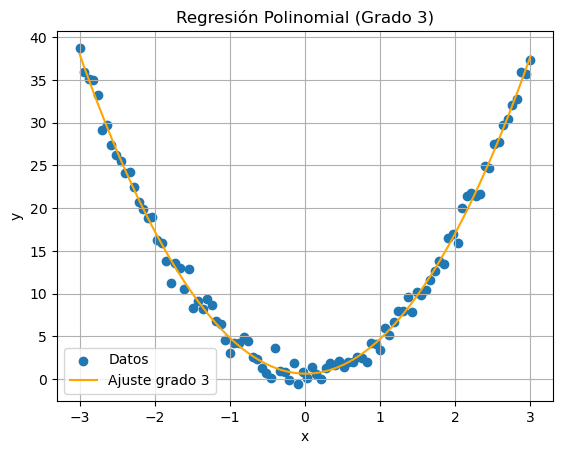

In [12]:
# Grado 3
plt.figure()
y_pred3 = modelo3.predict(X_poly3)
plt.scatter(x, y, label="Datos")
plt.plot(x, y_pred3, color="orange", label="Ajuste grado 3")
plt.title("Regresión Polinomial (Grado 3)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()


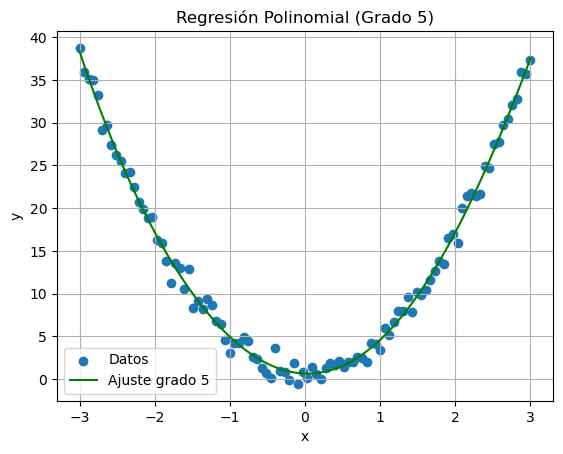

In [13]:
# Grado 5
plt.figure()
y_pred5 = modelo5.predict(X_poly5)
plt.scatter(x, y, label="Datos")
plt.plot(x, y_pred5, color="green", label="Ajuste grado 5")
plt.title("Regresión Polinomial (Grado 5)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()


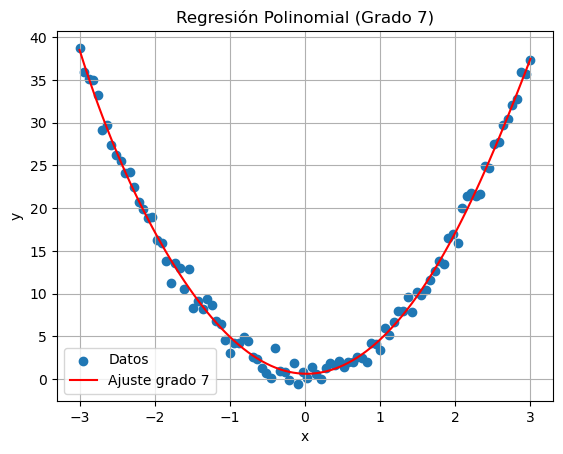

In [14]:
# Grado 7
plt.figure()
y_pred7 = modelo7.predict(X_poly7)
plt.scatter(x, y, label="Datos")
plt.plot(x, y_pred7, color="red", label="Ajuste grado 7")
plt.title("Regresión Polinomial (Grado 7)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()


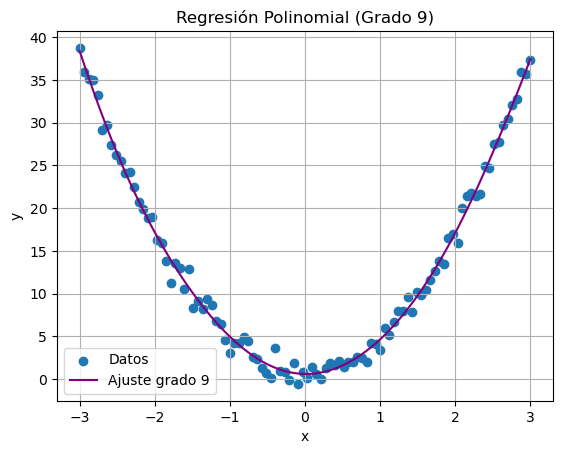

In [15]:
# Grado 9
plt.figure()
y_pred9 = modelo9.predict(X_poly9)
plt.scatter(x, y, label="Datos")
plt.plot(x, y_pred9, color="purple", label="Ajuste grado 9")
plt.title("Regresión Polinomial (Grado 9)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()


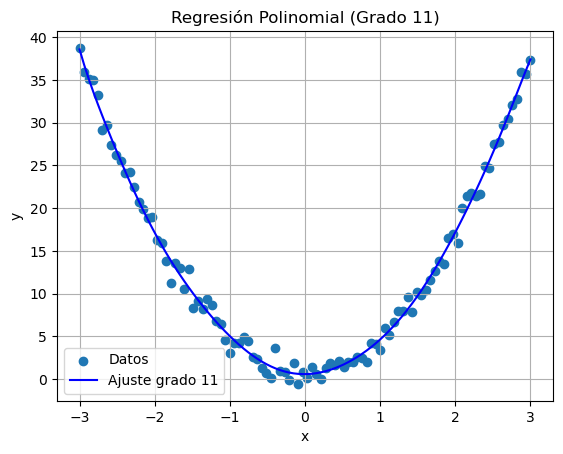

In [16]:
# Grado 11
plt.figure()
y_pred11 = modelo11.predict(X_poly11)
plt.scatter(x, y, label="Datos")
plt.plot(x, y_pred11, color="blue", label="Ajuste grado 11")
plt.title("Regresión Polinomial (Grado 11)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()


**¿Cuál modelo consideras que es mejor? ¿Por qué?**

No pareciera haber una diferencia muy clara, pero considerando los valores de R2 podemos decir que el de grado 11 es mejor ajuste por estar mas cerca del 1, aunque no sea una gran diferencia

Recuerda que una de las metas de ajustar modelos es para poder interpolar y extrapolar. Los datos que tenemos mantienen $x \in [-3, 3]$. ¿Qué pasaría si quisiéramos saber el valor de $y$ cuando $x=5$?

Calcula la predicción $\hat{y}$ para todos los modelos creados (grados 2, 3, 5, 7, 9, y 11).

In [17]:
# Nuevo valor para predecir
x_new = np.array([[5]])

# Función para predecir dado un modelo y transformador polinomial
def predecir(modelo, poly, x_val):
    X_val_poly = poly.transform(x_val)
    return modelo.predict(X_val_poly)[0]

# Grado 2
pred_2 = predecir(modelo_poly, poly, x_new)
print("Predicción (grado 2):", pred_2)

# Grado 3
pred_3 = predecir(modelo3, poly3, x_new)
print("Predicción (grado 3):", pred_3)

# Grado 5
pred_5 = predecir(modelo5, poly5, x_new)
print("Predicción (grado 5):", pred_5)

# Grado 7
pred_7 = predecir(modelo7, poly7, x_new)
print("Predicción (grado 7):", pred_7)

# Grado 9
pred_9 = predecir(modelo9, poly9, x_new)
print("Predicción (grado 9):", pred_9)

# Grado 11
pred_11 = predecir(modelo11, poly11, x_new)
print("Predicción (grado 11):", pred_11)


Predicción (grado 2): 103.9688695481995
Predicción (grado 3): 104.25232438790754
Predicción (grado 5): 84.59895012673215
Predicción (grado 7): 33.74321847616457
Predicción (grado 9): 215.73637926343895
Predicción (grado 11): -5265.344253512725


¿Cuál modelo crees que sea mejor?

Aunque todos los R² son altos, vemos que grados altos (7, 9, 11) generan predicciones absurdas al extrapolar (
−5265
−5265 es un claro sobreajuste).

El modelo grado 2 da una predicción muy cercana a la realidad del generador de datos (
y=1+4x2≈101
y=1+4x
2
≈101).

El grado 3 también es razonable, pero ya empieza a desviarse un poco.

Esto confirma que el modelo más simple que capture la forma real es mejor para generalizar y extrapolar.

El modelo de grado 2 es el mejor porque:

Captura correctamente la forma parabólica de los datos.

Tiene R² alto.

Predice valores razonables fuera del rango observado.

No sobreajusta ni produce resultados inestables.

## Referencia

James, G., Witten, D., Hastie, T., Tibshirani, R.,, Taylor, J. (2023). An Introduction to Statistical Learning with Applications in Python. Cham: Springer. ISBN: 978-3-031-38746-3